# Intro to Pandas and Matplotlib Part I

## Quiz 4 Answers

Question 1

In [103]:
x = 'abc def   ghi\njkl\n'
print(x.strip().split())

['abc', 'def', 'ghi', 'jkl']


Question 2

In [104]:
def compute(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return b-a


print(compute(6))

5


Question 3

num_list.txt

5,7,3

2,4,2

4,8,6

```python
frh = open('num_list.txt', 'r')
fwh = open('result.txt', 'w')
result = 0
for line in frh:
    n = line.strip().split(',')
    result += (int(n[0]) + int(n[1])) / int(n[2])
```

Answer: 9.0

## Creating objects in Pandas

Pandas is  a great library for manipulating data that we are used to dealing with in biology a.k.a the excel spreadsheet.  Pandas can also create basic plots utilizing the power of the matplotlib API which we will also cover in more detail.

For more info (and to see where I'm pulling material for this tutorial) check out [10 min to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

In [105]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pprint

There are two main object types in Pandas, 1) the series and 2) the dataframe.  A series looks a lot like a list and can accept mixed data types.  It can also be indexed like a list.  And like a list, series objects are mutable and therefore item assingment can take place.

In [106]:
s = pd.Series([1,3,5,'a',6,8])
print(s)
#indexing looks is similar to a list
print(s[0])


0    1
1    3
2    5
3    a
4    6
5    8
dtype: object
1


In [107]:
#item reassignment
s[0] = 2
print(s)

0    2
1    3
2    5
3    a
4    6
5    8
dtype: object


To get a list of series methods, you can use tab completetion in the notebook or dir().  Try this below.

In [108]:
dir(s)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__

More exciting than the series object and more useful to us, is the dataframe.  Dataframes have rows and columns and dataframes can be created in multiple ways. Also, notice that in the notebook, where code is run interactively, you do not have to use print statements to return output.  However, in pycharm or when running code from scripts, you must still use the print statement.

In [109]:
df1 = {'a':[1, 2], 'b': (3, 4), 'c': ['cat', 'dog']}
pd.DataFrame(df1)

,a,b,c
0,1,3,cat
1,2,4,dog


In [110]:
df2 = [['a',1,2], ['b', 3,4], ['c', 'cat', 'dog']]
pd.DataFrame(df2)


,0,1,2
0,a,1,2
1,b,3,4
2,c,cat,dog


In [111]:
df = [{'a':1, 'b':4}, {'a':2, 'c':3}]
pd.DataFrame(df)

,a,b,c
0,1,4.0,NaN
1,2,NaN,3.0


More important to our uses, we can give Pandas an excel spreadsheet or text file and then play with that data.  And the file i/o is way easier than base python.  The data we are playing with today is compliments of Larsson et al., 2007.  In this study, the authors examined differential expression upon overexpression of a protein in cell culture.  To see what a day in the life of dealing with other people's data is like, we will now ask some questions of this dataset.  

Notice the last column, has empty space or missing data.  Pandas will automatically deal with that.

![alt text](Screen Shot 2016-09-28 at 9.24.25 AM.png)

In [112]:
#this reads the data into a dataframe object, using a tab separated character.  The index_col argument is optional
# and sets the first column in the data as rownames which is similar to how R works.
genelist = pd.read_table('Supplement_table02.txt', sep='\t', index_col=0)
# genelist_excel = pd.read_excel('Supplement_table02.xlsx', index_col=0)

In [113]:
help(pd.read_table)

Help on function read_table in module pandas.io.parsers:

read_table(filepath_or_buffer, sep='\t', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=N

## Viewing the data

Let's view the data frame.  You can see that Pandas filled in missing values with NaN.

In [114]:
genelist

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_130786,1.0,A1BG,alpha-1-B glycoprotein,2.176788,1.998233,NaN
NM_015665,8086.0,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1.952652,3.753678,NaN
NM_001087,14.0,AAMP,"angio-associated, migratory cell protein",2.808783,0.637618,NaN
NM_025267,80755.0,AARSD1,alanyl-tRNA synthetase domain containing 1,1.962436,9.865391,NaN
NM_012089,23456.0,ABCB10,"ATP-binding cassette, sub-family B (MDR/TAP), ...",0.225564,1.707905,-4.433328
NM_007189,10061.0,ABCF2,"ATP-binding cassette, sub-family F (GCN20), me...",2.226917,8.039531,NaN
NM_005692,10061.0,ABCF2,"ATP-binding cassette, sub-family F (GCN20), me...",2.661841,8.727441,NaN
NM_015407,25864.0,ABHD14A,abhydrolase domain containing 14A,0.462046,9.428327,-2.164288
NM_020676,57406.0,ABHD6,abhydrolase domain containing 6,0.394502,8.039531,-2.534839
NM_005759,10152.0,ABI2,abl interactor 2,1.621564,7.653744,NaN


In [115]:
genelist.head()

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_130786,1.0,A1BG,alpha-1-B glycoprotein,2.176788,1.998233,NaN
NM_015665,8086.0,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1.952652,3.753678,NaN
NM_001087,14.0,AAMP,"angio-associated, migratory cell protein",2.808783,0.637618,NaN
NM_025267,80755.0,AARSD1,alanyl-tRNA synthetase domain containing 1,1.962436,9.865391,NaN
NM_012089,23456.0,ABCB10,"ATP-binding cassette, sub-family B (MDR/TAP), ...",0.225564,1.707905,-4.433328


In [116]:
genelist.tail()

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_148969,NaN,NaN,NaN,0.575574,6.349791,-1.737395
XM_496301,NaN,NaN,NaN,0.374709,3.399167,-2.668740
NM_181862,NaN,NaN,NaN,1.953817,8.270250,NaN
NM_145646,NaN,NaN,NaN,0.476765,8.270250,-2.097469
NM_153032,NaN,NaN,NaN,2.087563,5.763981,NaN


In [117]:
#to get the column names
genelist.columns

Index(['Geneid', 'Gene symbol', 'Gene name', 'Fold Change', 'q-value (%)',
       'Negative Fold Change'],
      dtype='object')

In [118]:
# to get the row names
genelist.index

Index(['NM_130786', 'NM_015665', 'NM_001087', 'NM_025267', 'NM_012089',
       'NM_007189', 'NM_005692', 'NM_015407', 'NM_020676', 'NM_005759',
       ...
       'XM_372719', 'XM_498218', 'NM_016572', 'XM_379274', 'XM_114303',
       'NM_148969', 'XM_496301', 'NM_181862', 'NM_145646', 'NM_153032'],
      dtype='object', length=3085)

In [119]:
genelist.values

array([[1.0, 'A1BG', 'alpha-1-B glycoprotein', 2.17678774,
        1.9982331000000002, nan],
       [8086.0, 'AAAS',
        'achalasia, adrenocortical insufficiency, alacrimia (Allgrove, triple-A)',
        1.95265248, 3.753678, nan],
       [14.0, 'AAMP', 'angio-associated, migratory cell protein',
        2.80878298, 0.637618, nan],
       ..., 
       [nan, nan, nan, 1.95381657, 8.27025, nan],
       [nan, nan, nan, 0.47676513, 8.27025, -2.097468831],
       [nan, nan, nan, 2.08756334, 5.7639809, nan]], dtype=object)

In [120]:
genelist.shape

(3085, 6)

In [121]:
#good for numerical data, especially when you need to plot the data
genelist.describe()

,Geneid,Fold Change,q-value (%),Negative Fold Change
count,2932.000000,3085.000000,3085.000000,838.000000
mean,43870.984993,1.764652,4.961999,-2.673922
std,64141.163141,1.341177,3.038489,1.097826
min,1.000000,0.078751,0.000000,-12.698268
25%,5921.000000,0.542572,2.103816,-2.848319
50%,11316.000000,1.844670,4.611046,-2.393723
75%,57175.000000,2.207867,8.039531,-2.094661
max,654364.000000,24.535279,9.865391,-1.593398


Notice that the summary table included summary statistics for Geneid which aren't really numerical values but ids for genes.  We will fix this shortly.

## Indexing the Data

First, we want to index the dataframe.  How do we get rows and columns that are interesting?

```python
Indexing is in this general format:
dataframe[column name]
dataframe.loc[rows, columns]

#one column
genelist['Geneid']

#multiple columns
genelist[['Geneid', 'Gene symbol']]

#one row and one column    
genelist.loc['NM_130786','Geneid']
genelist.loc['NM_130786', 0]
genelist.loc[0,0]

#all values in one column
genelist.loc[:,'Geneid']

#all values in one row
genelist.loc['NM_130786', :]

#all values in multiple columns, put multiple items into list, must be consistent with datatypes in list
genelist.loc[:, ['Geneid', 'Gene name']]
genelist.loc[:, 0:3]
```

In [122]:
genelist.loc['NM_130786','Geneid']

1.0

## Indexing exercise

Return the last column of the genelist dataframe.

In [123]:
genelist.iloc[:, -1].head()

NM_130786         NaN
NM_015665         NaN
NM_001087         NaN
NM_025267         NaN
NM_012089   -4.433328
Name: Negative Fold Change, dtype: float64

Return NM_148969, NM_181862, XM_496301 rows of the genelist dataframe. Hint: this type of indexing will look similar in syntax to returning multiple columns. 

In [124]:
genelist.loc[['NM_148969', 'NM_181862', 'XM_496301'], :]

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_148969,NaN,NaN,NaN,0.575574,6.349791,-1.737395
NM_181862,NaN,NaN,NaN,1.953817,8.270250,NaN
XM_496301,NaN,NaN,NaN,0.374709,3.399167,-2.668740


Return only the gene symbols from the previous question.

In [125]:
genelist.loc[['NM_148969', 'NM_181862', 'XM_496301'], 'Gene symbol']

NM_148969    NaN
NM_181862    NaN
XM_496301    NaN
Name: Gene symbol, dtype: object

## Reassignment

In [126]:
genelist['Geneid'].dtype

dtype('float64')

In [127]:
genelist['Geneid'].astype('str')

NM_130786                      1.0
NM_015665                   8086.0
NM_001087                     14.0
NM_025267                  80755.0
NM_012089                  23456.0
NM_007189                  10061.0
NM_005692                  10061.0
NM_015407                  25864.0
NM_020676                  57406.0
NM_005759                  10152.0
NM_014945                  22885.0
NM_013375                  29777.0
NM_005891                     39.0
NM_022914                  65057.0
NM_181865                  11332.0
NM_181866                  11332.0
NM_181864                  11332.0
NM_007274                  11332.0
NM_004300                     52.0
NM_177554                     52.0
NM_007099                     52.0
NM_203372                   2181.0
NM_004457                   2181.0
NM_005736                  10121.0
NM_005735                  10120.0
NM_020445                  57180.0
NM_000666                     95.0
NM_001107                     97.0
NM_138448           

In [128]:
genelist['Geneid'].dtype

dtype('float64')

In [129]:
#reassinging values in a column in place
genelist['Geneid'] = genelist['Geneid'].astype('str')

In [130]:
genelist['Geneid'].dtype

dtype('O')

In [131]:
genelist.describe()

,Fold Change,q-value (%),Negative Fold Change
count,3085.000000,3085.000000,838.000000
mean,1.764652,4.961999,-2.673922
std,1.341177,3.038489,1.097826
min,0.078751,0.000000,-12.698268
25%,0.542572,2.103816,-2.848319
50%,1.844670,4.611046,-2.393723
75%,2.207867,8.039531,-2.094661
max,24.535279,9.865391,-1.593398


## Basic plots of the data

I would like to work only with the numerical data see the distribution of values for specific columns. 

Text(0,0.5,'Frequency')

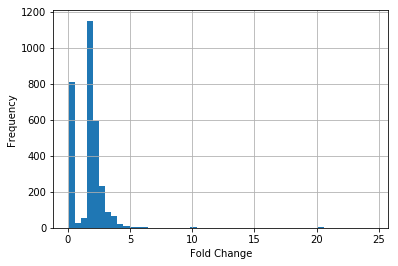

In [132]:
ax = genelist['Fold Change'].hist(bins=50)
ax.set_xlabel('Fold Change')
ax.set_ylabel('Frequency')

We can see that there are a lot of values around zero and no negative values.  Meaning if we want to at some point look at negative fold-changes the authors have wierdly put those in the adjacent column.  Also, the authors titled this figure, "Significant translational changes", without defining significant.  So, lets try to see if they used some sort of FDR %threshold.

Text(0,0.5,'Frequency')

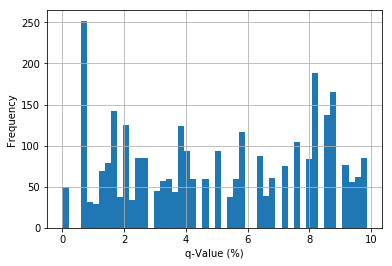

In [133]:
ax2 = genelist['q-value (%)'].hist(bins=50)
ax2.set_xlabel('q-Value (%)')
ax2.set_ylabel('Frequency')

## Filtering

We see now that there are some weird things in the data.  There are genes that lack names, which are not useful for downstream pathway analysis and for reasons unknown, the authors provided downregulated genes as negative values or fractions of one.  So we are going to try and fix some of these things.  We also have 3,085 probe values to work with, and if you've ever tried to validate 3000 target genes at the bench, I'm feeling bad for you.  So we are going to try and reduce our targets trying several strategies. 

## Filtering the data for smaller gene-list using conditionals in Pandas.

Some ways to reduce the gene-list:  
1. Filter out genes without gene symbols
2. Make the q-value cut-off more strict
3. Employ a fold-change cut-off

### Filter by q-value

Pull out rows where q-value is < 5% by using a Boolean mask.  Here is what the mask looks like:

In [134]:
mask = genelist['q-value (%)']<5
mask.head()

NM_130786     True
NM_015665     True
NM_001087     True
NM_025267    False
NM_012089     True
Name: q-value (%), dtype: bool

To index into the dataframe, plug the mask into the rows index:
```python
dataframe.loc[Boolean mask, columns]
```

In [135]:
strict_frame = genelist.loc[mask,:]
strict_frame

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_130786,1.0,A1BG,alpha-1-B glycoprotein,2.176788,1.998233,NaN
NM_015665,8086.0,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1.952652,3.753678,NaN
NM_001087,14.0,AAMP,"angio-associated, migratory cell protein",2.808783,0.637618,NaN
NM_012089,23456.0,ABCB10,"ATP-binding cassette, sub-family B (MDR/TAP), ...",0.225564,1.707905,-4.433328
NM_014945,22885.0,ABLIM3,"actin binding LIM protein family, member 3",2.205244,4.611046,NaN
NM_013375,29777.0,ABT1,activator of basal transcription 1,3.284837,0.637618,NaN
NM_004300,52.0,ACP1,"acid phosphatase 1, soluble",2.790544,0.637618,NaN
NM_177554,52.0,ACP1,"acid phosphatase 1, soluble",2.288103,1.219488,NaN
NM_007099,52.0,ACP1,"acid phosphatase 1, soluble",2.288103,1.219488,NaN
NM_203372,2181.0,ACSL3,acyl-CoA synthetase long-chain family member 3,0.254533,1.707905,-3.928758


In [136]:
strict_frame.shape

(1597, 6)

Just for fun I want to pull out the rows of the dataframe where the gene symbol is something specific like my labmates' 3 favorite genes.  You know, when your lab members ask "What is the fold-change for this gene?" and they for whatever reason don't know how to use the find fucntion in excel.  

In [137]:
sublist = ['ACP1', 'SOMEGENE', 'ADA']
strict_frame['Gene symbol'].isin(sublist).head()

NM_130786    False
NM_015665    False
NM_001087    False
NM_012089    False
NM_014945    False
Name: Gene symbol, dtype: bool

In [138]:
#save the mask to a variable and use it to index your matrix
newmask = strict_frame['Gene symbol'].isin(sublist)
strict_frame.loc[newmask,:]


,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_004300,52.0,ACP1,"acid phosphatase 1, soluble",2.790544,0.637618,NaN
NM_177554,52.0,ACP1,"acid phosphatase 1, soluble",2.288103,1.219488,NaN
NM_007099,52.0,ACP1,"acid phosphatase 1, soluble",2.288103,1.219488,NaN
NM_000022,100.0,ADA,adenosine deaminase,3.166759,1.021824,NaN


## Tools to filter our NaN's

Things that aren't useful: Gene Symbols that are NaN.  So another way to make our dataset smaller is to filter out those NaNs.

In [139]:
strict_frame.tail()

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
XM_372719,nan,NaN,NaN,0.349097,2.016183,-2.864532
NM_016572,nan,NaN,NaN,2.102908,4.611046,NaN
XM_379274,nan,NaN,NaN,2.172858,1.939343,NaN
XM_114303,nan,NaN,NaN,0.446474,2.590323,-2.239770
XM_496301,nan,NaN,NaN,0.374709,3.399167,-2.668740


This is actually a tool to identify NaNs.  We are going to use it to specifically identify the location of NaN's in a column.  However, it can take an entire dataframe as an arguement.

In [140]:
pd.isnull(strict_frame['Gene symbol']).head()

NM_130786    False
NM_015665    False
NM_001087    False
NM_012089    False
NM_014945    False
Name: Gene symbol, dtype: bool

We want to return a dataframe where rows that have Gene symbol as NaN are no longer there.  We can use Boolean indexing to do this.  What happens when we run this code:
```python
strict_frame.loc [pd.isnull(strict_frame['Gene symbol']),:]
```

In [141]:
strict_frame.loc [pd.isnull(strict_frame['Gene symbol']),:].head()

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_144495,nan,NaN,NaN,2.383440,2.972720,NaN
XM_375449,nan,NaN,NaN,1.963692,3.672424,NaN
XR_000132,nan,NaN,NaN,3.682663,0.637618,NaN
NM_183063,nan,NaN,NaN,2.127440,1.939343,NaN
XM_375698,nan,NaN,NaN,2.497546,2.601228,NaN


You should notice that when you index with the Boolean mask, you return all of the rows where Gene Symbol has a NaN.  Which is actually the exact opposite of what we want to do, however, there's a nifty way of taking the inverse. 

In [142]:
stricter = strict_frame.loc[~pd.isnull(strict_frame['Gene symbol']),:]
stricter.head()

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_130786,1.0,A1BG,alpha-1-B glycoprotein,2.176788,1.998233,NaN
NM_015665,8086.0,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1.952652,3.753678,NaN
NM_001087,14.0,AAMP,"angio-associated, migratory cell protein",2.808783,0.637618,NaN
NM_012089,23456.0,ABCB10,"ATP-binding cassette, sub-family B (MDR/TAP), ...",0.225564,1.707905,-4.433328
NM_014945,22885.0,ABLIM3,"actin binding LIM protein family, member 3",2.205244,4.611046,NaN


In [143]:
stricter.shape


(1523, 6)

## Filtering by Fold-change - Using And/Or Conditional Statement

Not much reduction.  Let's try one more thing.  Let's figure out which genes have a 2 fold change in up or down direction.  Looking at our data, we notice that there are only positive numbers in the fold-change column.  If we look at our distribution plot for fold-change, we notice what about the distribution?:
1. our positive fold-changes are above:
2. our negative fold-changes are below:

### Exercise

Create a mask for upregulated genes and a separate mask for downregulated genes.  

In [144]:
strict_frame.columns

Index(['Geneid', 'Gene symbol', 'Gene name', 'Fold Change', 'q-value (%)',
       'Negative Fold Change'],
      dtype='object')

In [145]:
up = strict_frame['Fold Change'] > 2
down = strict_frame['Fold Change']<0.5

In [146]:
#or statement
strict_frame.loc[(up) | (down),:].head()

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_130786,1.0,A1BG,alpha-1-B glycoprotein,2.176788,1.998233,NaN
NM_001087,14.0,AAMP,"angio-associated, migratory cell protein",2.808783,0.637618,NaN
NM_012089,23456.0,ABCB10,"ATP-binding cassette, sub-family B (MDR/TAP), ...",0.225564,1.707905,-4.433328
NM_014945,22885.0,ABLIM3,"actin binding LIM protein family, member 3",2.205244,4.611046,NaN
NM_013375,29777.0,ABT1,activator of basal transcription 1,3.284837,0.637618,NaN


### Exercise

How can we create a mask that filters for q-value and fold change? Create one more mask that selects for rows that are below 5% - see above and use the genelist dataframe object to filter for q-value and fold change in one line of code.  This will require that you google how to filter rows with AND condition in pandas. 

In [147]:
qvalue_mask = genelist['q-value (%)']<5

In [148]:
final_frame = strict_frame.loc[(up) | (down) & (genelist['q-value (%)']<5),:]

Did this reduce the number of genes? How would we check?

In [149]:
final_frame.shape

(1348, 6)

## Write your filtered data to a file

In [150]:
strict_frame.to_csv('filtered_data.txt', sep='\t')

## For next time: We will be figuring out what to do with all of those duplicate values for gene symbols, and we will combine this current dataframe with perhaps a dictionary or other dataframe and plotting that data.